Informática - 1º de Física - UMU
<br>
**Computación Científica**
<br>
*A.Ruiz, J. Abellán*

<p style="color:#808080"> <small><small>
 17/11/2017
</small></small></p>

## Caos determinista

En este notebook se reproducen los experimentos descritos en el artículo *Simple mathematical models with very complicated dynamics* ([Robert May, 1976](http://abel.harvard.edu/archive/118r_spring_05/docs/may.pdf)).

### Visualización

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.linspace(0,1,1000)

def f(l,x):
    return l*x*(1-x)


def iterada(n,f):
    def g(l,x):
        z = x
        for k in range(n):
            z = f(l,z)
        return z
    return g

In [3]:
def fun(lam=3,steps=30,niter=1,x0=0.2):
    plt.figure(figsize=(8,8))
    #x0 = 1-1/lam + 0.001
    g = iterada(niter,f)
    plt.plot(X,g(lam,X))
    plt.plot(X,X,color='gray',ls='dashed');
    x  = [x0]
    xp = [x0]
    yp = [0]
    nx = x0
    for k in range(steps):
        nx = g(lam,nx)
        x  += [nx]
        xp += [xp[-1],nx]          # añadimos dos tramos, uno  vertical hacia la función
        yp += [nx,nx]              # y otro horizontal hacia la bisectriz 
    plt.plot(xp,yp,color='red',lw=0.5)
    plt.plot(x,np.zeros(len(x)),'.',color='blue',alpha=0.15, markerSize=15)
    #plt.title(str(nx))

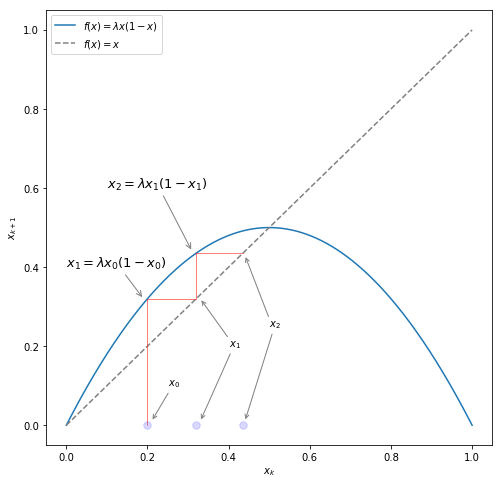

In [4]:
fun(2,2,1,0.2)

arrow = arrowprops=dict(color='gray',arrowstyle="->", connectionstyle="arc3")

plt.annotate('$x_0$', xy=(0.21,0.01), xytext=(0.25,0.1), arrowprops=arrow);
plt.annotate('$x_1=\lambda x_0 (1-x_0)$', xy=(0.19,0.32), xytext=(0.0,0.4), arrowprops=arrow, fontsize=13);
plt.annotate('$x_1$', xy=(0.33,0.01), xytext=(0.4,0.2), arrowprops=arrow);
plt.annotate('', xy=(0.33,0.32), xytext=(0.4,0.22), arrowprops=arrow);
plt.annotate('$x_2$', xy=(0.44,0.01), xytext=(0.5,0.25), arrowprops=arrow);
plt.annotate('', xy=(0.44,0.43), xytext=(0.5,0.27), arrowprops=arrow);
plt.annotate('$x_2=\lambda x_1 (1-x_1)$', xy=(0.31,0.44), xytext=(0.1,0.6), arrowprops=arrow,fontsize=13);
plt.legend(["$f(x)=\lambda x (1-x)$",'$f(x)=x$']); plt.xlabel('$x_k$'); plt.ylabel('$x_{k+1}$');

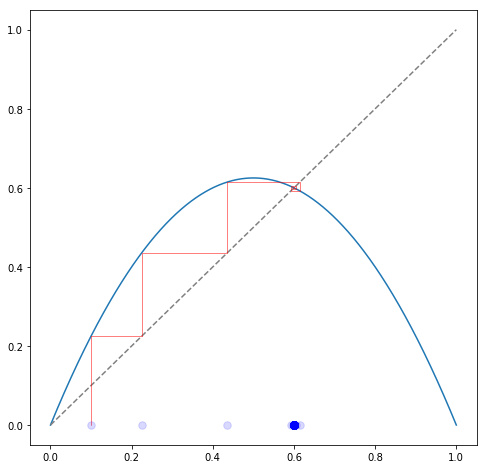

In [5]:
fun(2.5,100,x0=0.1)

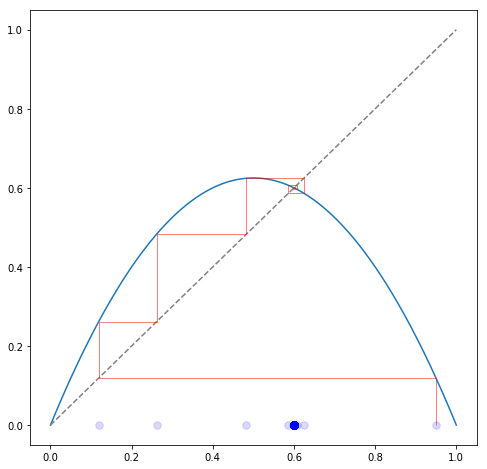

In [6]:
fun(2.5,100,x0=0.95)

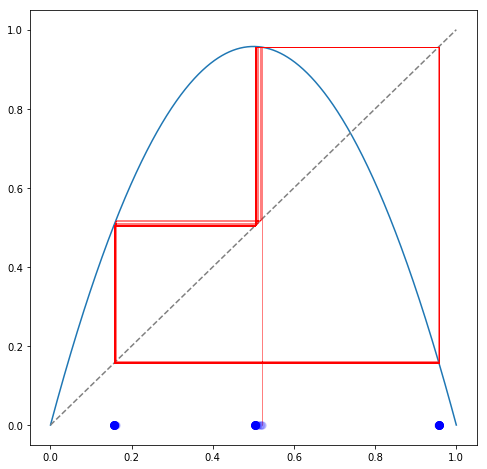

In [7]:
fun(3.83,100,x0=0.52)

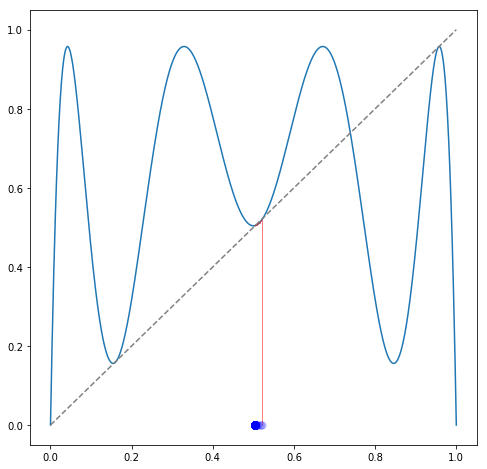

In [8]:
fun(3.83,100,3,0.52)

### Visualización interactiva

In [9]:
from ipywidgets import interact

@interact(lam=(2.,4,0.01),steps=(0,30),niter=(1,16),x0=(0.,1,0.01))
def ifun(lam=3,steps=30,niter=1,x0=0.2):
    fun(lam,steps,niter,x0)
    plt.show()

interactive(children=(FloatSlider(value=3.0, description='lam', max=4.0, min=2.0, step=0.01), IntSlider(value=…

### Diagrama de bifurcación

Generamos una secuencia de longitud deseada.

In [10]:
def mkSec(lam, x0=0.5, n=10000):
    x = np.zeros(n)
    x[0] = x0
    for k in range(1,n):
        x[k] = f(lam,x[k-1])
    return x

In [11]:
mkSec(3.5, x0=0.1, n=30)

array([0.1       , 0.315     , 0.7552125 , 0.64703303, 0.79933451,
       0.56139598, 0.86180687, 0.41683527, 0.8507927 , 0.4443057 ,
       0.86414351, 0.41089828, 0.84721309, 0.45305075, 0.86728519,
       0.40285557, 0.84197036, 0.46569696, 0.87088155, 0.39356405,
       0.83534986, 0.48139164, 0.87378805, 0.38598872, 0.829505  ,
       0.49499259, 0.87491224, 0.38304284, 0.82712358, 0.50046557])

Luego dejamos avanzar la secuencia 'drop' elementos, y nos quedamoscon los 'n' últimos, donde se supone que ya se ha estabilizado en un ciclo.

In [12]:
def limit(lam, x0=0.5, drop=1000, n=100):
    return mkSec(lam, x0, drop+n)[-n:]

Lo comprobamos con un $\lambda$, partiendo de dos valores iniciales distintos. (Agrupamos de 4 en 4 para mostrar visualmente el ciclo. Salen los mismos valores, aunque en orden distinto.)

In [13]:
limit(3.5,0.5, n=20).reshape(-1,4)

array([[0.50088421, 0.87499726, 0.38281968, 0.82694071],
       [0.50088421, 0.87499726, 0.38281968, 0.82694071],
       [0.50088421, 0.87499726, 0.38281968, 0.82694071],
       [0.50088421, 0.87499726, 0.38281968, 0.82694071],
       [0.50088421, 0.87499726, 0.38281968, 0.82694071]])

In [14]:
limit(3.5,0.2, n=20).reshape(-1,4)

array([[0.82694071, 0.50088421, 0.87499726, 0.38281968],
       [0.82694071, 0.50088421, 0.87499726, 0.38281968],
       [0.82694071, 0.50088421, 0.87499726, 0.38281968],
       [0.82694071, 0.50088421, 0.87499726, 0.38281968],
       [0.82694071, 0.50088421, 0.87499726, 0.38281968]])

Para construir el diagrama de bifurcación generamos el ciclo final de la secuencia para sucesivos valores de $\lambda$, y se dibuja cada conjunto en la misma posición horizontal.

In [15]:
def bifurcación(l1,l2):
    lams = np.linspace(l1,l2,200)
    for l in lams:
        y = limit(l,n=100)
        x = l*np.ones(len(y))
        plt.plot(x,y,'.',color='red',markerSize=1)

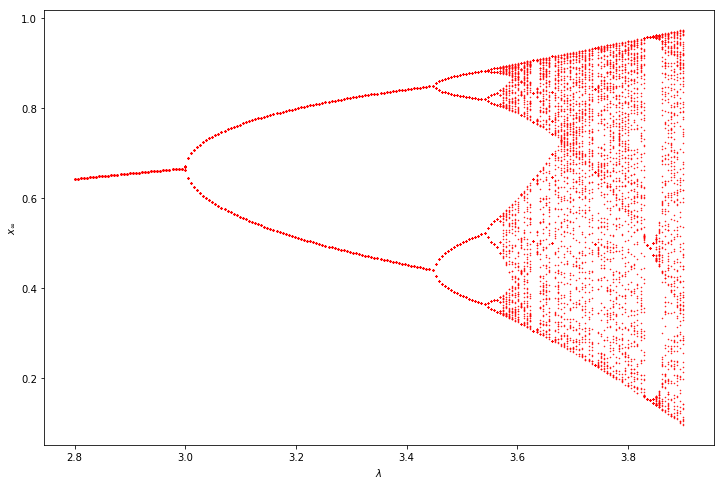

In [16]:
plt.figure(figsize=(12,8))
bifurcación(2.8,3.9)
plt.xlabel("$\lambda$"); plt.ylabel("$x_\infty$");

Hacemos zoom en un par de zonas:

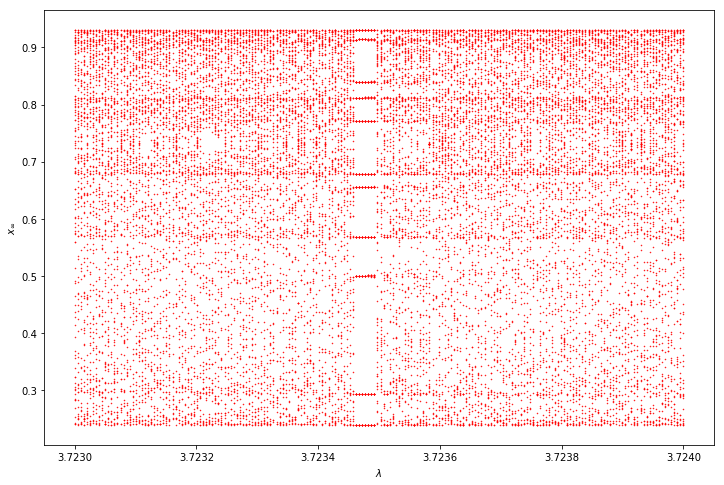

In [17]:
plt.figure(figsize=(12,8))
bifurcación(3.723,3.724)
plt.xlabel("$\lambda$"); plt.ylabel("$x_\infty$");

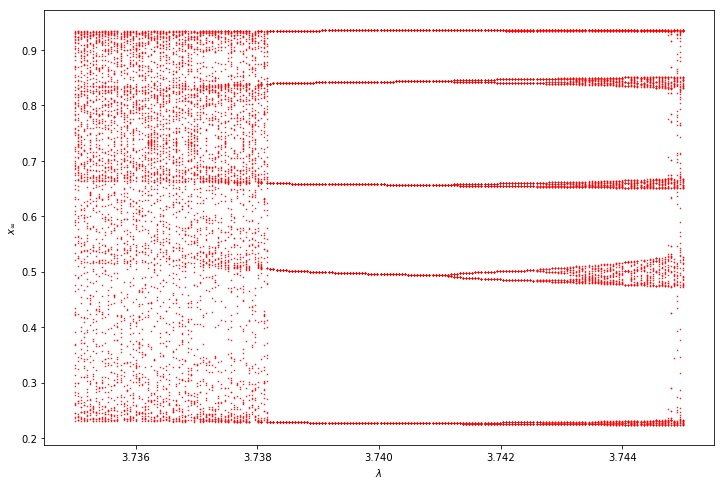

In [18]:
plt.figure(figsize=(12,8))
bifurcación(3.735,3.745)
plt.xlabel("$\lambda$"); plt.ylabel("$x_\infty$");

### Exponente de Lyapunov

In [19]:
def f(l,x):
    return l*x*(1-x)

def deriv(l,x):
    return l*(1-2*x)

def mkSecxd(lam,x0=0.5):
    x = x0
    while True:
        nx = f(lam,x)
        d  = deriv(lam,nx)
        yield (nx,d)

def lyapunov(lam,x0=0.5, n=1000):
    sec = it.islice(mkSecxd(lam),n)
    l = [np.log(abs(d)) for _,d in sec]
    r = np.mean(l)
    return r

In [20]:
lam = np.linspace(2.5,4,100)
plt.plot(lam,[lyapunov(l,0.2) for l in lam])
plt.plot([lam[0],lam[-1]],[1,1],color='red');

NameError: name 'it' is not defined

### Aleatoriedad *vs* caos

In [ ]:
def exper(x):
    plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    plt.plot(x,'.')
    plt.xlabel('$k$')
    plt.ylabel('$x_k$')
    plt.subplot(2,2,3)
    plt.plot(x[:-1],x[1:],'.');
    plt.xlabel('$x_k$')
    plt.ylabel('$x_{k+1}$')
    plt.axis('equal');
    plt.subplot(2,2,2)
    plt.hist(x,orientation='horizontal');

In [ ]:
r = np.random.rand(1000)

exper(r)

In [ ]:
s = np.array(list(it.islice(mkSec(4,0.1),1000)))

exper(s)

In [ ]:
s = np.array(list(it.islice(mkSec(3.738,0.1),1000)))

exper(s)

### Solución analítica

Mediante un enfoque combinado de cálculo simbólico y numérico.

In [26]:
import numpy as np
from sympy import *
from sympy.abc import alpha, beta, gamma, delta, epsilon

init_printing(pretty_print=True)

from IPython.display import display

In [27]:
lamda,x = symbols(['lambda','x'])

In [28]:
def f(x): return lamda * x * (1-x)

def iterada(n,f):
    def g(x):
        z = x
        for k in range(n):
            z = f(z)
        return z
    return g

In [29]:
(f(f(x))-x).expand()

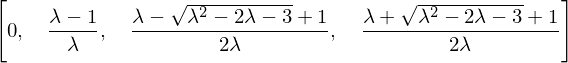

In [30]:
solve(Eq(x, f(f(x)).expand()),x)

In [31]:
import scipy

def cortes(it,l,verbose=False):
    h = iterada(it,f)(x)
    if verbose:
        display(h)
    fun = poly(h.subs(lamda,l),x)
    der = diff(fun,x)
    g = fun-x
    sols = scipy.roots(g.coeffs())
    r = [(v.real, der.subs(x,v.real)) for v in sols if abs(v.imag) < 1E-6]
    return r

In [32]:
cortes(3,3.8,verbose=True)

In [33]:
cortes(8,3.7)